# <h1 align='center'> <font color='royalblue'><font size=6>⚡Powerplay Assessment⚡</font> </font></h1>

<h2 align='center'>Done by : <font color='blue'><b> KASI</b></font></h2>

<kbd>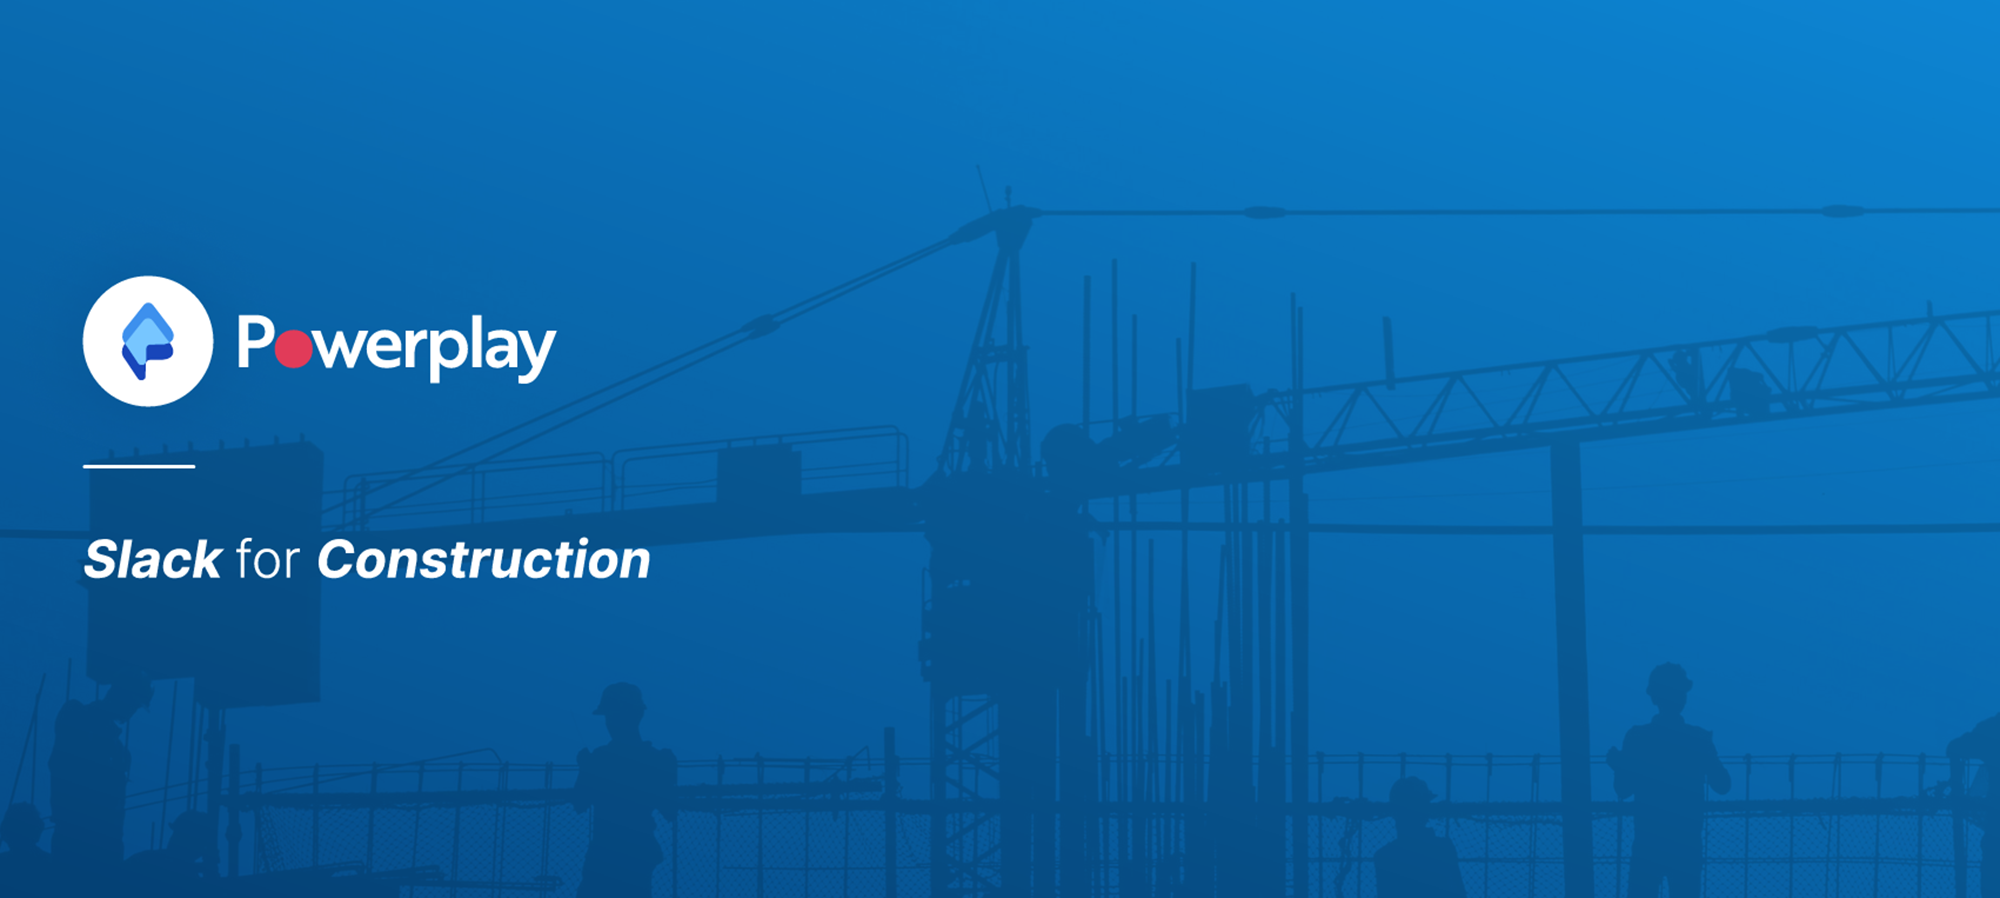</kbd>

In [1]:
import pandas as pd

## 🔷 Set 1:-
Use data set to answer the following questions using SQL :-

https://raw.githubusercontent.com/rashida048/Datasets/master/movie_dataset.csv 

(Read Json data using Python / R Script and create Movie table in database) 

In [2]:
df = pd.read_csv('movie_dataset.csv')

df['release_date'] = pd.to_datetime(df['release_date'])

ndf = df[['budget','title','production_companies','production_countries','release_date','runtime','vote_average','popularity','revenue']]

ndf['runtime'] = ndf['runtime'].fillna(ndf['runtime'].mode()[0])
ndf['release_date'] = ndf['release_date'].fillna(ndf['release_date'].mode()[0])

display(ndf.isna().sum())

C:\Users\KASI Profession\AppData\Local\Temp\ipykernel_22140\959624700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['runtime'] = ndf['runtime'].fillna(ndf['runtime'].mode()[0])
C:\Users\KASI Profession\AppData\Local\Temp\ipykernel_22140\959624700.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['release_date'] = ndf['release_date'].fillna(ndf['release_date'].mode()[0])


budget                  0
title                   0
production_companies    0
production_countries    0
release_date            0
runtime                 0
vote_average            0
popularity              0
revenue                 0
dtype: int64

In [3]:
movie_data = ndf.copy()

# Converting the 'production_companies' and 'production_countries' columns from JSON string to python list
# json.loads didnt work
movie_data['production_companies'] = movie_data['production_companies'].apply(eval)
movie_data['production_countries'] = movie_data['production_countries'].apply(eval)

movie_data

,budget,title,production_companies,production_countries,release_date,runtime,vote_average,popularity,revenue
0,237000000,Avatar,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,162.0,7.2,150.437577,2787965087
1,300000000,Pirates of the Caribbean: At World's End,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,169.0,6.9,139.082615,961000000
2,245000000,Spectre,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,148.0,6.3,107.376788,880674609
3,250000000,The Dark Knight Rises,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,165.0,7.6,112.312950,1084939099
4,260000000,John Carter,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,132.0,6.1,43.926995,284139100
...,...,...,...,...,...,...,...,...,...
4798,220000,El Mariachi,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'MX', 'name': 'Mexico'}, {'iso...",1992-09-04,81.0,6.6,14.269792,2040920
4799,9000,Newlyweds,[],[],2011-12-26,85.0,5.9,0.642552,0
4800,0,"Signed, Sealed, Delivered","[{'name': 'Front Street Pictures', 'id': 3958}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-10-13,120.0,7.0,1.444476,0
4801,0,Shanghai Calling,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-05-03,98.0,5.7,0.857008,0


In [4]:
movie_data['production_companies'] = movie_data['production_companies'].apply(lambda x: [company['name'] for company in x])
movie_data['production_countries'] = movie_data['production_countries'].apply(lambda x: [country['name'] for country in x])

movie_data.head()

,budget,title,production_companies,production_countries,release_date,runtime,vote_average,popularity,revenue
0,237000000,Avatar,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,162.0,7.2,150.437577,2787965087
1,300000000,Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,169.0,6.9,139.082615,961000000
2,245000000,Spectre,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,148.0,6.3,107.376788,880674609
3,250000000,The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,165.0,7.6,112.312950,1084939099
4,260000000,John Carter,[Walt Disney Pictures],[United States of America],2012-03-07,132.0,6.1,43.926995,284139100


In [5]:
df = movie_data.copy()

In [6]:
unnesting = ['production_companies','production_countries']
for column in unnesting:
    df = df.explode(column)

In [7]:
df

,budget,title,production_companies,production_countries,release_date,runtime,vote_average,popularity,revenue
0,237000000,Avatar,Ingenious Film Partners,United States of America,2009-12-10,162.0,7.2,150.437577,2787965087
0,237000000,Avatar,Ingenious Film Partners,United Kingdom,2009-12-10,162.0,7.2,150.437577,2787965087
0,237000000,Avatar,Twentieth Century Fox Film Corporation,United States of America,2009-12-10,162.0,7.2,150.437577,2787965087
0,237000000,Avatar,Twentieth Century Fox Film Corporation,United Kingdom,2009-12-10,162.0,7.2,150.437577,2787965087
0,237000000,Avatar,Dune Entertainment,United States of America,2009-12-10,162.0,7.2,150.437577,2787965087
...,...,...,...,...,...,...,...,...,...
4800,0,"Signed, Sealed, Delivered",Muse Entertainment Enterprises,United States of America,2013-10-13,120.0,7.0,1.444476,0
4801,0,Shanghai Calling,NaN,United States of America,2012-05-03,98.0,5.7,0.857008,0
4801,0,Shanghai Calling,NaN,China,2012-05-03,98.0,5.7,0.857008,0
4802,0,My Date with Drew,rusty bear entertainment,United States of America,2005-08-05,90.0,6.3,1.929883,0


In [8]:
df.isna().sum()

budget                    0
title                     0
production_companies    394
production_countries    184
release_date              0
runtime                   0
vote_average              0
popularity                0
revenue                   0
dtype: int64

In [9]:
df['production_companies'] = df['production_companies'].fillna('unknown')
df['production_countries'] = df['production_countries'].fillna('unknown')

In [10]:
df.isna().sum()

budget                  0
title                   0
production_companies    0
production_countries    0
release_date            0
runtime                 0
vote_average            0
popularity              0
revenue                 0
dtype: int64

In [11]:
df.to_csv('powerplay_movie_cleaned.csv',index=False)

In [12]:
df.shape

(22780, 9)

### 📂Loaded to Bigquery

### ⚡ 1. Which is the movie(s) with the smallest runtime?
``` sql
SELECT DISTINCT
    title AS smallest_movie,
    runtime AS duration_in_mins
FROM
    `powerplay.powerplay_movie_cleaned`
WHERE
    runtime = (
        SELECT MIN(runtime)
        FROM `powerplay.powerplay_movie_cleaned`
    )
GROUP BY
    1, 2;
```
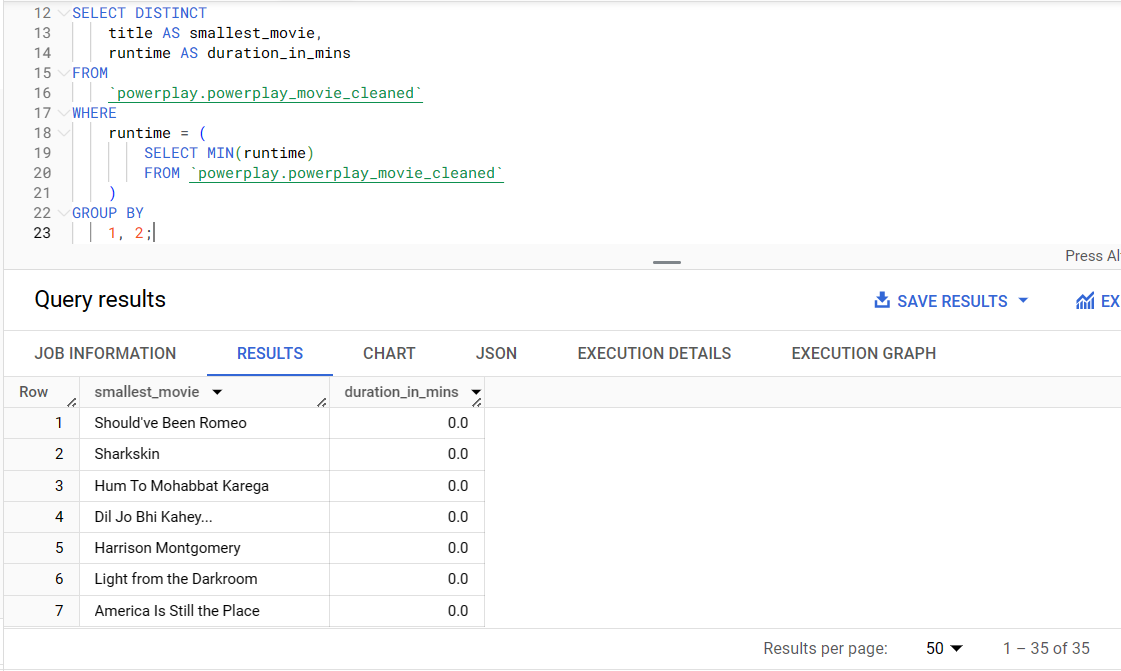


### ⚡Which is the movie(s) with the highest runtime?

``` sql
SELECT DISTINCT
    title AS Lengthiest_movie,
    runtime AS duration_in_mins
FROM
    `powerplay.powerplay_movie_cleaned`
WHERE
    runtime = (
        SELECT MAX(runtime)
        FROM `powerplay.powerplay_movie_cleaned`
    )
GROUP BY
    1, 2;
```
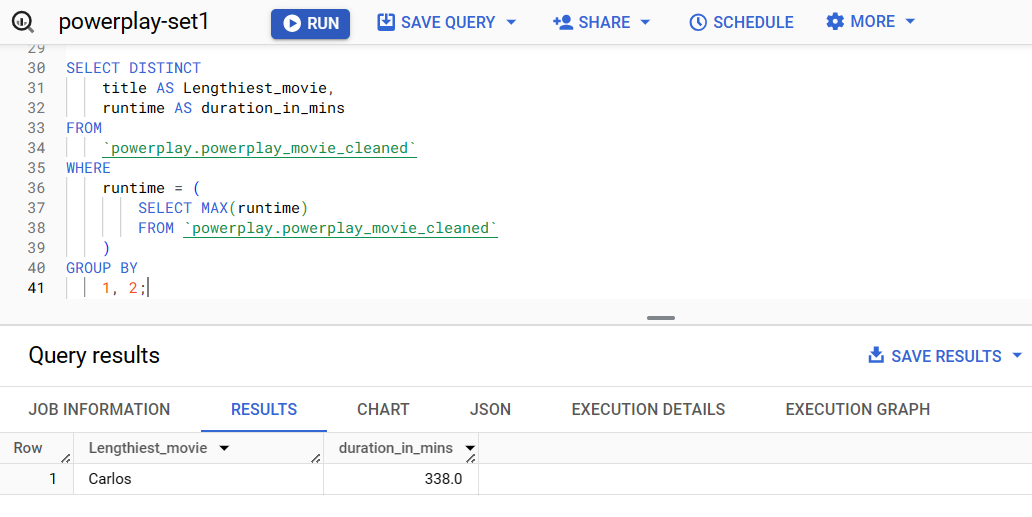

#### 🔹Insight:

* There are 35 movies with duration as 0.0 mins of runtime.
* `Carlos` movie is lengthiest movie with duration of 338 minutes.

------

### ⚡2.Take the top 5 production houses (by budget) and list their top 5 most popular movies, their revenue and vote_average.


```sql

WITH top_production_houses AS (
    SELECT DISTINCT
        production_companies,
        DENSE_RANK() OVER (ORDER BY MAX(budget) DESC) AS rnk
    FROM
        `powerplay.powerplay_movie_cleaned`
    GROUP BY 1
    ORDER BY 2
    LIMIT 5
)
SELECT production_house,movie_name,revenue,vote_average 
FROM (
    SELECT
        p.production_companies as production_house,
        p.title AS movie_name,
        p.revenue,
        p.vote_average,
        ROW_NUMBER() OVER (PARTITION BY p.production_companies ORDER BY p.popularity DESC) AS popularity_rnk
    FROM
        `powerplay.powerplay_movie_cleaned` p
    JOIN
        top_production_houses tp
    USING (production_companies) ) as c
WHERE
    popularity_rnk <= 5
ORDER BY
  production_house;
```

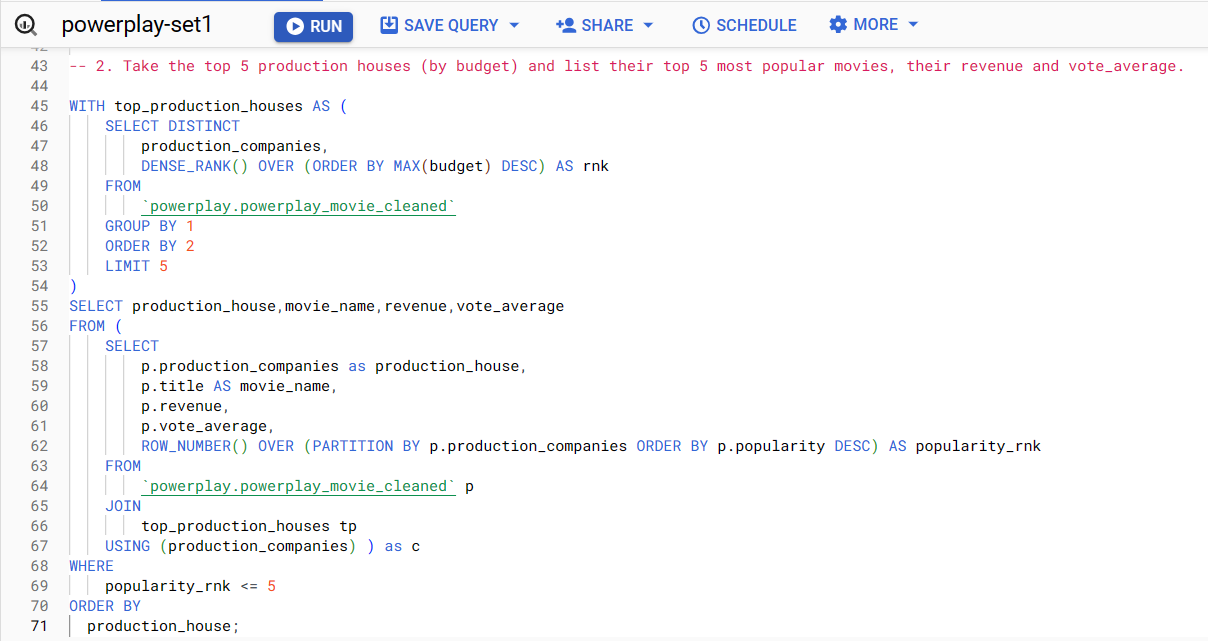

#### Output:

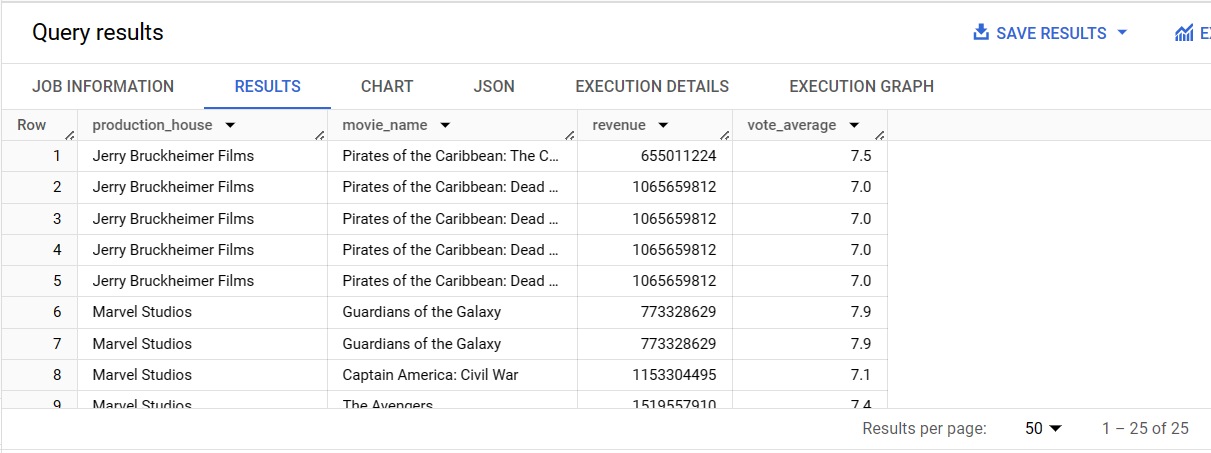

#### 🔹Insights:

Top Production houses by budget:

* Walt Disney Pictures

* Moving Picture Company (MPC)
	
* Jerry Bruckheimer Films
	
* Second Mate Productions
	
* Marvel Studios

and each production houses top 5 productions are listed.

-----

----

### ⚡3. List the production house for every year from 2000-2016 which has released the most number of movies in that year.

``` sql
WITH yearlymoviecounts AS (
    SELECT
        EXTRACT(YEAR FROM release_date) AS release_year,
        production_companies,
        COUNT(DISTINCT title) AS num_of_movies
    FROM
        `powerplay.powerplay_movie_cleaned`
    WHERE
        EXTRACT(YEAR FROM release_date) BETWEEN 2000 AND 2016
        AND production_companies != 'unknown'
    GROUP BY
        release_year, production_companies
    ORDER BY
        release_year, num_of_movies DESC
),topproductioncompanies AS (
    SELECT
        *,
        ROW_NUMBER() OVER (PARTITION BY release_year ORDER BY num_of_movies DESC) AS rn
    FROM
        yearlymoviecounts
)
SELECT
    release_year,production_companies,num_of_movies
FROM
    topproductioncompanies
WHERE
    rn = 1
ORDER BY
    release_year;
```

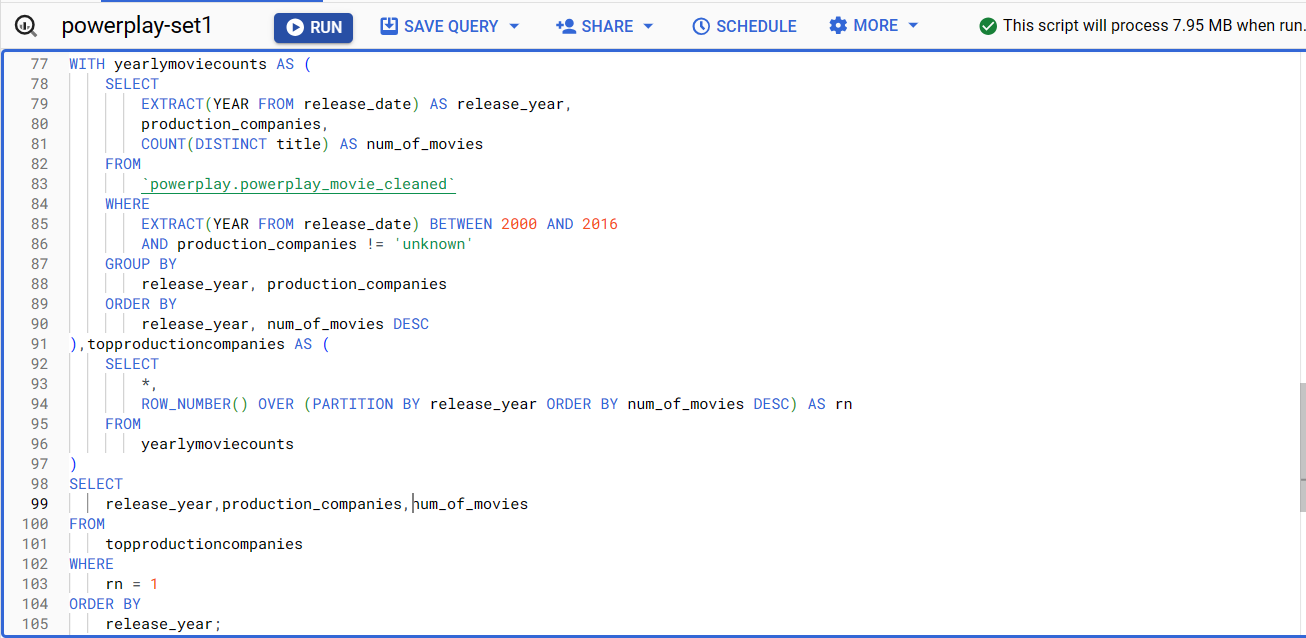

#### Output:

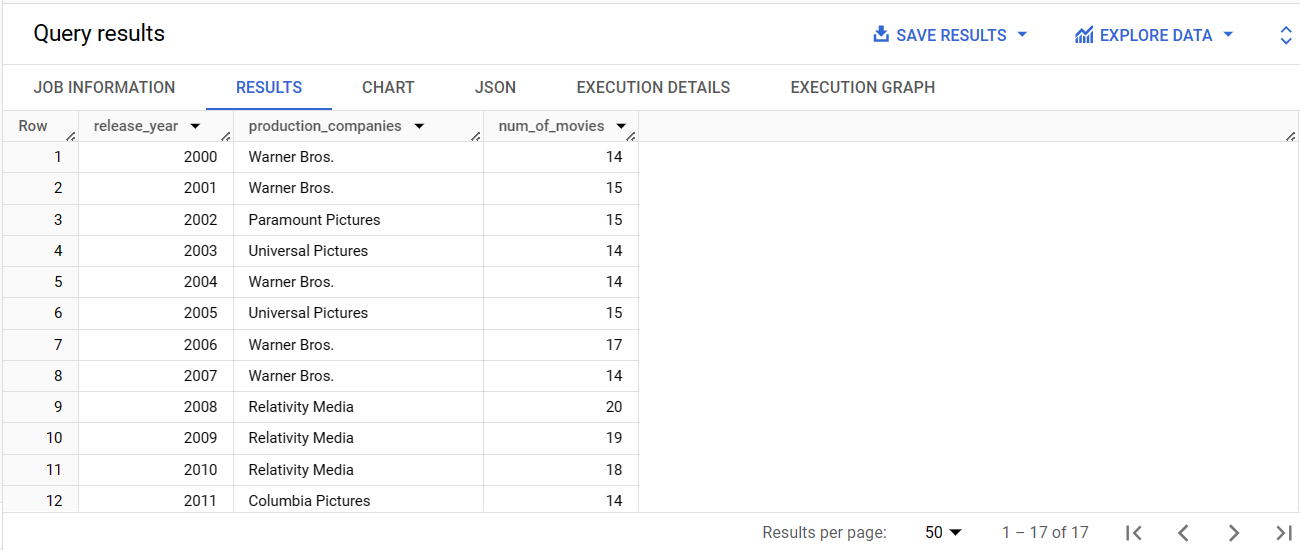

#### 🔹Insights:

* For all the 17 years from 2000 to 2016 , every years Highest no.of movies producing Productions are listed with no.of productions.
* Most of years `Warner Bros` has made many movies followed by `Relative Media` production House.

----

----

----

### ⚡4. You are going to invest all your life's savings in a production company. You have two choices: "Marvel Studios" and "DC Comics". Which company would you bet on? This is an open ended question. Define your own metrics to measure which one is a better investment opportunity and defend your analysis. 

 * If I had to pick between *Marvel Studios* and *DC Comics* for my investments, I'd go with ***`Marvel`***. 

Here's why:

> I'm a fan of Comics and I love both Marvel and DC Theoretically but Cinematically I would prefer `Marvel` because of the cinematic experience, VFX, post credit scenes and writer of Marvel comics `STAN LEE`'s cameo presence makes it enjoyable than DC.   

> Marvel movies are fun and family-friendly, reaching a big audience, even families. DC tends to be darker, so it might not appeal to as many people. Marvel keeps trying new flavors and changes based on what people like. DC can be slower to do that.

> Marvel is also good at exploring new things. They introduce new characters and listen to what fans like. DC, while sticking with its famous heroes, doesn't change as quickly.

> Marvel makes a superhero world where all the characters are connected. This makes fans stick around and keeps them excited for what's next. DC, on the other hand, usually keeps its superheroes separate, which means a bad movie doesn't affect the others, but a good one doesn't boost them much either.

> Marvel operates like a seamless universe, not just a collection of franchises. This interconnected approach cultivates fan loyalty and sustains repeat viewership. In contrast, DC tends to treat its superheroes as standalone franchises, minimizing the impact of a failure but also diluting the momentum of a success.

> Think of superhero movies like a candy vending machine. Marvel is like a big, well-run machine giving you a variety of flavors that all connect. If one flavor isn't great, you're still excited about the next one. DC is like several machines with just one flavor each. If one flavor doesn't work, that machine stops, and even if one is great, it doesn't really help the others.

> In short, Marvel knows how to keep things exciting and adapt to what people want & thereby yielding a profit and based on the BoxOffice collections for sure we can say Marvel studios Kevin Feigi & his team is Pro in it.



conclusion:


*  ***So, if I want my life savings to be safe and successful, I'd go with `Marvel` and invest in `Marvel Studios` to keep my principle safe and high yield of shares and profit.*** 


------

-----

-----


### 🔹🔹🔹🔹

### 🔹🔹🔹🔹

### 🔹🔹🔹🔹






## 🔷Set 2

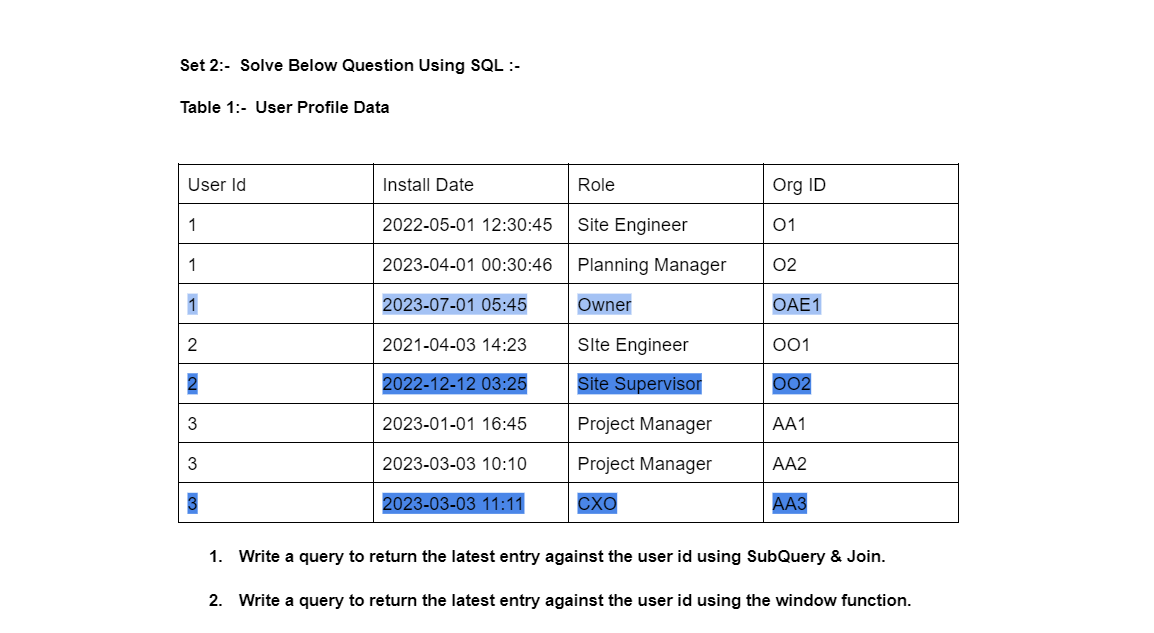

### ⚡1. Write a query to return the latest entry against the user id using SubQuery & Join.

``` sql
SELECT 
    ud1.*
FROM
    UserDetails ud1
        JOIN
    (SELECT 
        UserId, MAX(InstallDate) AS latest_entry
    FROM
        UserDetails
    GROUP BY 1) AS ud2 ON ud1.UserId = ud2.UserId
        AND ud1.InstallDate = ud2.latest_entry;
```

### Output:

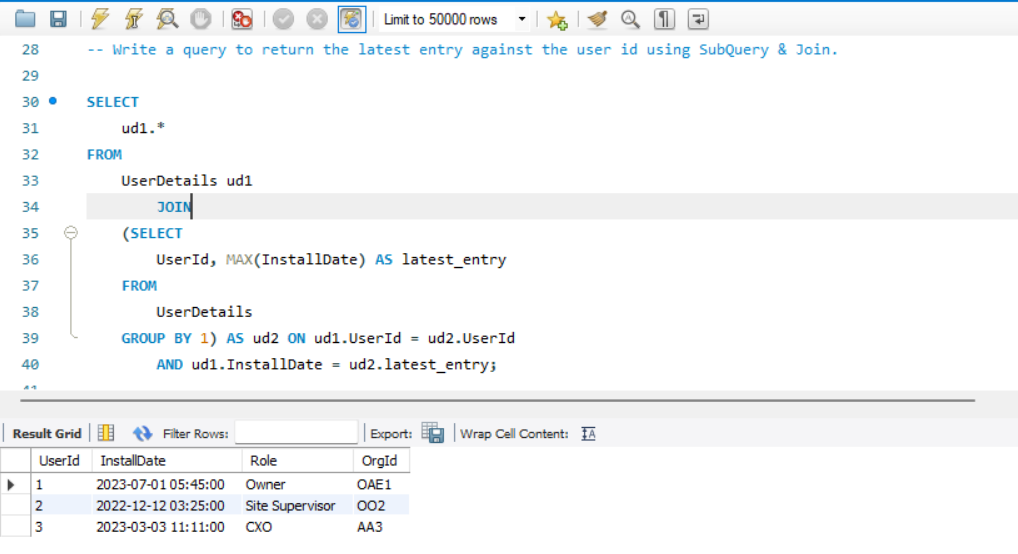


### ⚡2. Write a query to return the latest entry against the user id using the window function.

``` sql
WITH cte AS(
SELECT *,
	LAST_VALUE(InstallDate) OVER(PARTITION BY UserId) AS latest_entry
FROM 
	UserDetails
)
SELECT 
    UserId, InstallDate, Role, OrgId
FROM
    cte
WHERE
    InstallDate = latest_entry;

-- or  (rank or row_number)

WITH cte AS(
SELECT * ,
	RANK() OVER(PARTITION BY UserId ORDER BY InstallDate DESC) AS rnk
FROM 
	UserDetails
)
SELECT 
    UserId, InstallDate, Role, OrgId
FROM
    cte
WHERE
    rnk = 1;
```
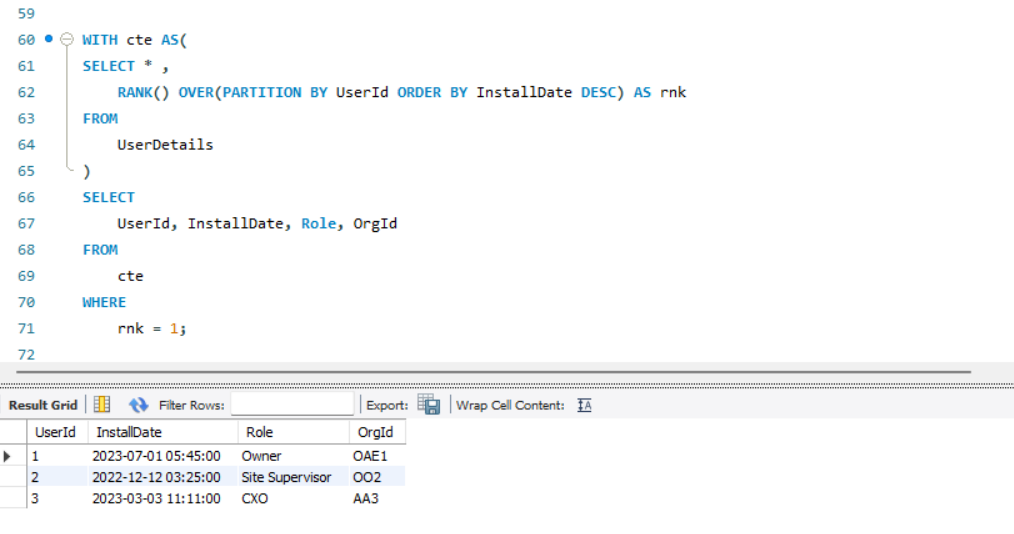

----

### ⚡1.Write a query to find the number of products bought in the month of January 2021.

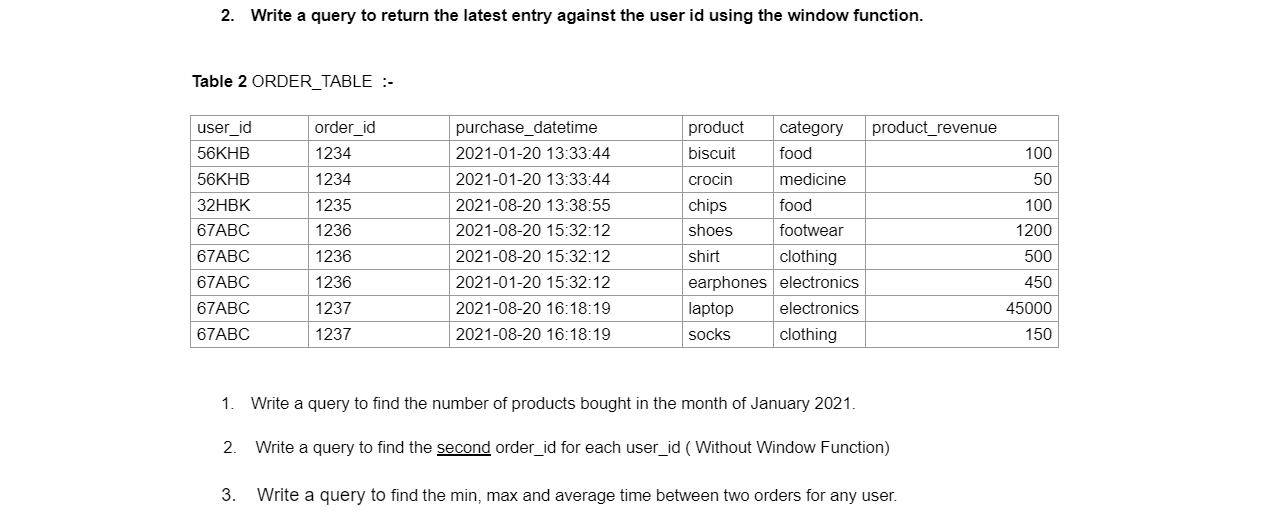

```sql
SELECT 
    COUNT(DISTINCT product) AS no_of_products
FROM
    OrderDetails
WHERE
    MONTH(purchase_datetime) = 01
        AND YEAR(purchase_datetime) = 2021;
```

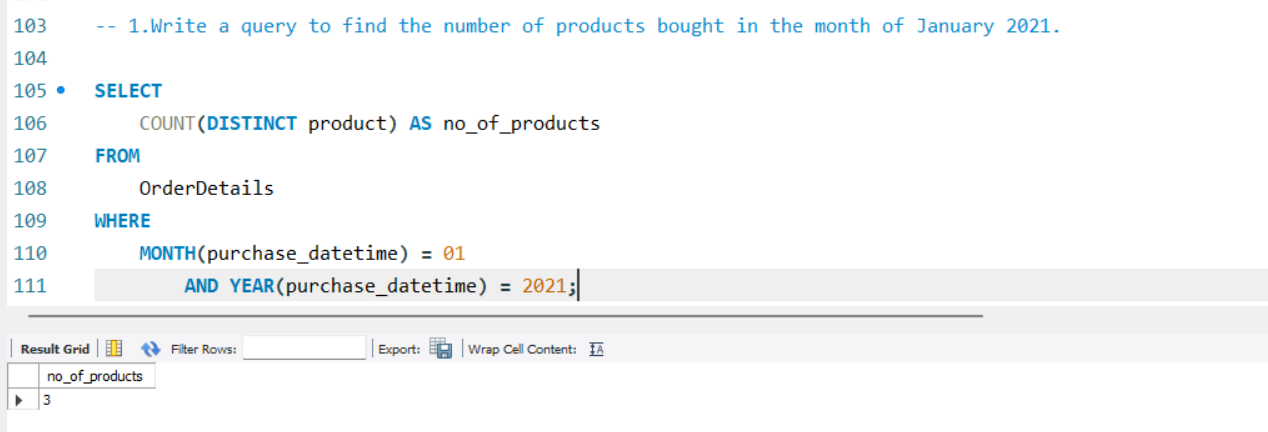

### ⚡2.Write a query to find the second order_id for each user_id ( Without Window Function)

```sql
SELECT 
    o1.user_id, o2.order_id AS Second_order_id
FROM
    OrderDetails o1
        JOIN
    OrderDetails o2 USING (user_id)
WHERE
    o1.order_id < o2.order_id
GROUP BY 1 , 2;
```
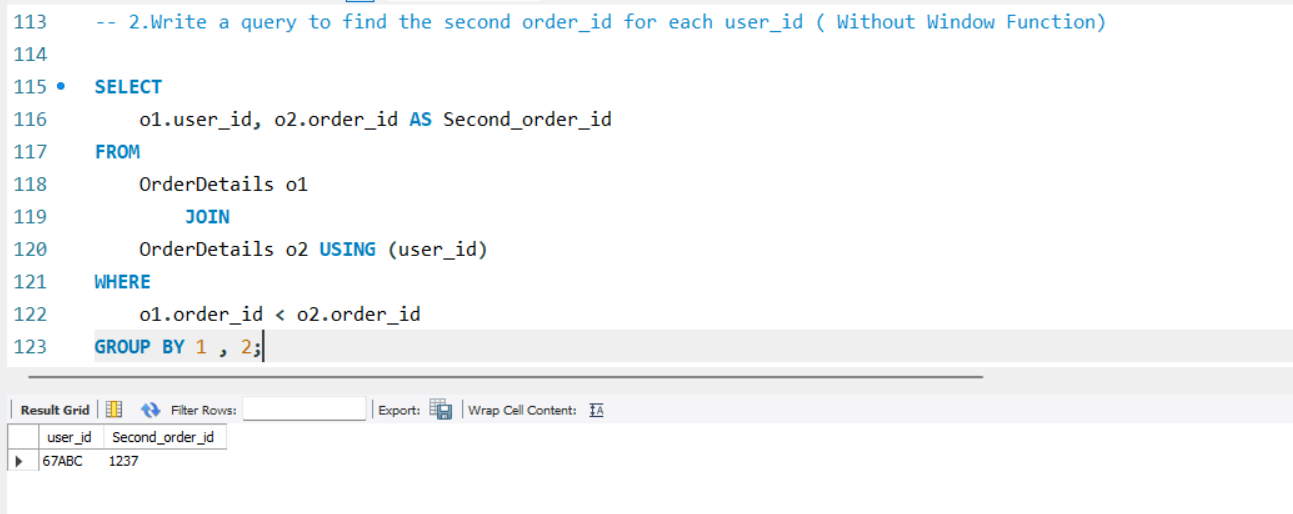

### ⚡3.Write a query to find the min, max and average time between two orders for any user.

``` sql
SELECT 
    user_id,
    MIN(between_time) AS min_time,
    MAX(between_time) AS max_time,
    AVG(between_time) AS avg_time
FROM
    (SELECT 
        user_id,
            DATEDIFF(MAX(purchase_datetime), MIN(purchase_datetime)) AS between_time
    FROM
        OrderDetails
    GROUP BY 1
    HAVING COUNT(DISTINCT order_id) > 1) AS c
GROUP BY 1;
```

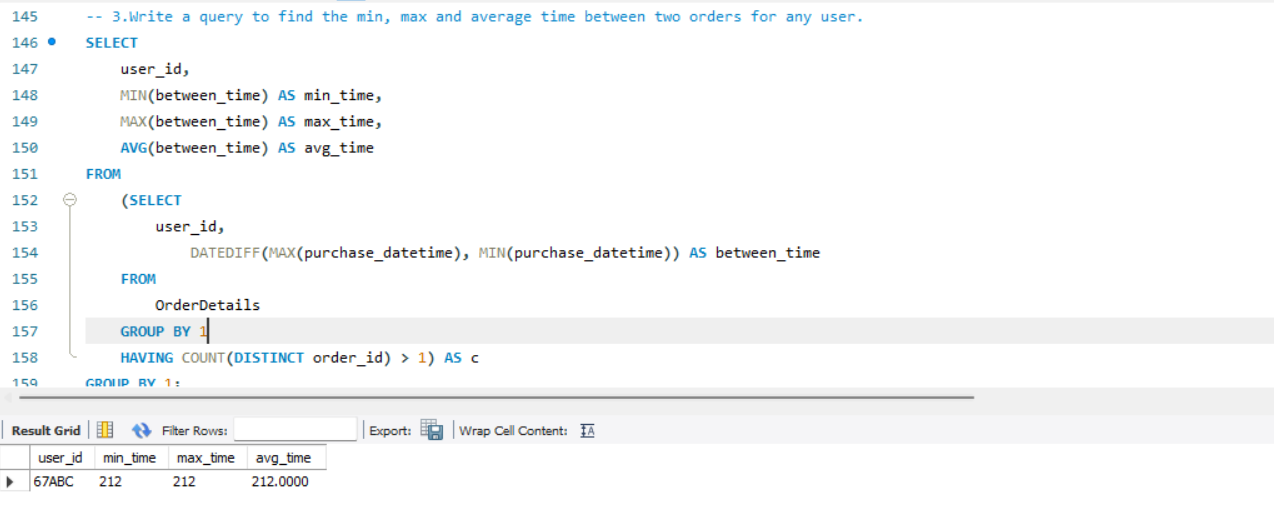

-----

### 🔹🔹🔹🔹


## 🔷Set 3:

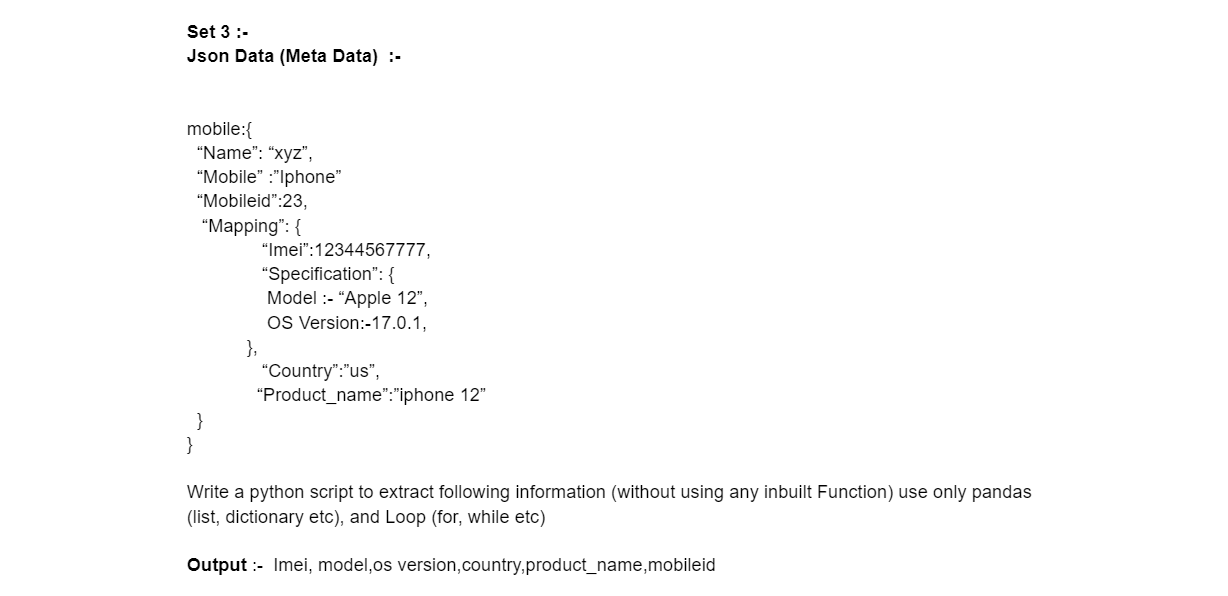


In [14]:
mobile = {
    "Name": "xyz",
    "Mobile": "Iphone",
    "Mobileid": 23,
    "Mapping": {
        "Imei": 12344567777,
        "Specification": {
            "Model": "Apple 12",
            "Os Version": "17.0.1",
        },
        "Country": "us",
        "Product_name": "iphone 12"
    }
}
print(mobile)

{'Name': 'xyz', 'Mobile': 'Iphone', 'Mobileid': 23, 'Mapping': {'Imei': 12344567777, 'Specification': {'Model': 'Apple 12', 'Os Version': '17.0.1'}, 'Country': 'us', 'Product_name': 'iphone 12'}}


In [15]:
result = {
          'Imei':None,
          'Model':None,
          'Os Version':None,
          'Country':None,
          'Product_name':None,
          'Mobileid':None
         }

result['Imei'] = mobile['Mapping']['Imei']

result['Model'] = mobile['Mapping']['Specification']['Model']

result['Os Version'] = mobile['Mapping']['Specification']['Os Version']

result['Country'] = mobile['Mapping']['Country']

result['Product_name'] = mobile['Mapping']['Product_name']

result['Mobileid'] = mobile['Mobileid']

for key,value in result.items():
    print(f"{key} - {value}")

Imei - 12344567777
Model - Apple 12
Os Version - 17.0.1
Country - us
Product_name - iphone 12
Mobileid - 23


-----

## 🔷Set 4:

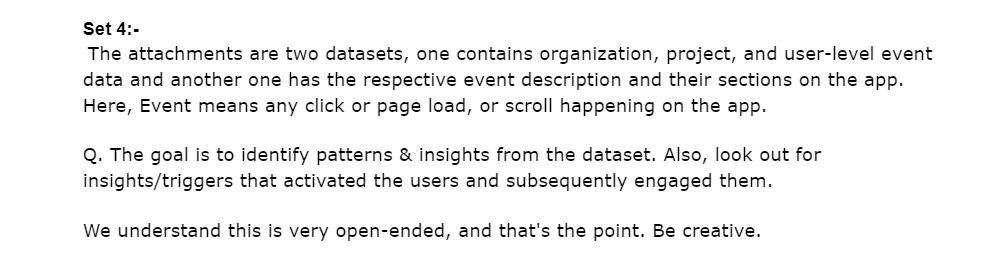

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df1 = pd.read_csv("User - Event Raw Dataset (2).csv" , parse_dates=[0])
df2 = pd.read_csv("Event Description Mapping (2).csv")
display(df1,df2)

,created_at_time,event,org_id,project_id,user_id
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk
...,...,...,...,...,...
41172,2022-04-07 08:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645


,Event,Description,Section
0,add_attendance_success,Successfully adding attendance of a person once,Labour
1,assigned_people_on_task,Assigned another person on a particular task,Task
2,attendance_list_accessed,Attendance list page opens on clicking this bu...,Labour
3,channel_message_sent,Message sent on chat feature,General
4,comment_create_success,Comment Created,General
5,dashboard_view_success,Dashboard Page Loading for a particular organi...,General
6,followup_button_clicked,Clicking Followup on a particular task/tasklog,Task
7,generate_report_success,Report for the overall work done generated for...,General
8,image_upload_success,User uploads an image on the app,General
9,indent_create_success,Material Added to Inventory,Material


In [19]:
df1.event.nunique()

17

In [20]:
df = pd.merge(df1,df2,left_on='event', right_on='Event',how='left')
df

,created_at_time,event,org_id,project_id,user_id,Event,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,project_creation_request_success,Successfully creating a new project,General
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,task_log_create_success,Successfully creating an update on a particula...,Task
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,task_creation,Successfully creating a task,Task
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,project_creation_request_success,Successfully creating a new project,General
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,task_log_create_success,Successfully creating an update on a particula...,Task
...,...,...,...,...,...,...,...,...
41172,2022-04-07 08:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372,assigned_people_on_task,Assigned another person on a particular task,Task
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372,assigned_people_on_task,Assigned another person on a particular task,Task
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674,assigned_people_on_task,Assigned another person on a particular task,Task
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645,task_creation,Successfully creating a task,Task


In [22]:
df.drop(columns='Event' , inplace=True)

In [27]:
df

,created_at_time,event,org_id,project_id,user_id,Description,Section
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating an update on a particula...,Task
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating a task,Task
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,Successfully creating an update on a particula...,Task
...,...,...,...,...,...,...,...
41172,2022-04-07 08:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372,Assigned another person on a particular task,Task
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372,Assigned another person on a particular task,Task
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674,Assigned another person on a particular task,Task
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645,Successfully creating a task,Task


In [23]:
df.isna().sum()

created_at_time      0
event                0
org_id               0
project_id         141
user_id              0
Description          0
Section              0
dtype: int64

In [24]:
df.created_at_time.min() , df.created_at_time.max()

(Timestamp('2022-01-01 22:59:53'), Timestamp('2023-02-23 14:10:43'))

In [25]:
timeframe = df.created_at_time.max() - df.created_at_time.min()
timeframe

Timedelta('417 days 15:10:50')

In [44]:
df.user_id.nunique()

543

In [45]:
df.org_id.nunique()

386

In [46]:
df.project_id.nunique()

914

In [48]:
df.project_id.value_counts(dropna=False)

project_id
PRJ256203650640    12820
PRJppirvslunbh9     1779
PRJ63dg0jj0k-vo     1481
PRJ8p2m3wyqmzs7     1348
PRJ355445863893     1280
                   ...  
PRJ248835439387        1
PRJavjwjc8r2upz        1
PRJ385368385547        1
PRJ726446108695        1
PRJ630204356710        1
Name: count, Length: 915, dtype: int64

#### 🔹Insights:

* There are 543 unique users of the App.
* There are 386 unique organizations who interact with the App.
* There are 914 known current Projects with 141 data with unknown project_id.  

In [26]:
df.event.value_counts()

event
material_profile_material_load      10114
add_attendance_success               7569
stock_material_updated               7272
task_log_create_success              5010
comment_create_success               2054
channel_message_sent                 1867
generate_report_success              1701
task_creation                        1602
new_material_added                   1243
attendance_list_accessed              837
project_creation_request_success      651
dashboard_view_success                622
assigned_people_on_task               290
indent_create_success                 158
thread_create_success                  93
image_upload_success                   70
followup_button_clicked                24
Name: count, dtype: int64

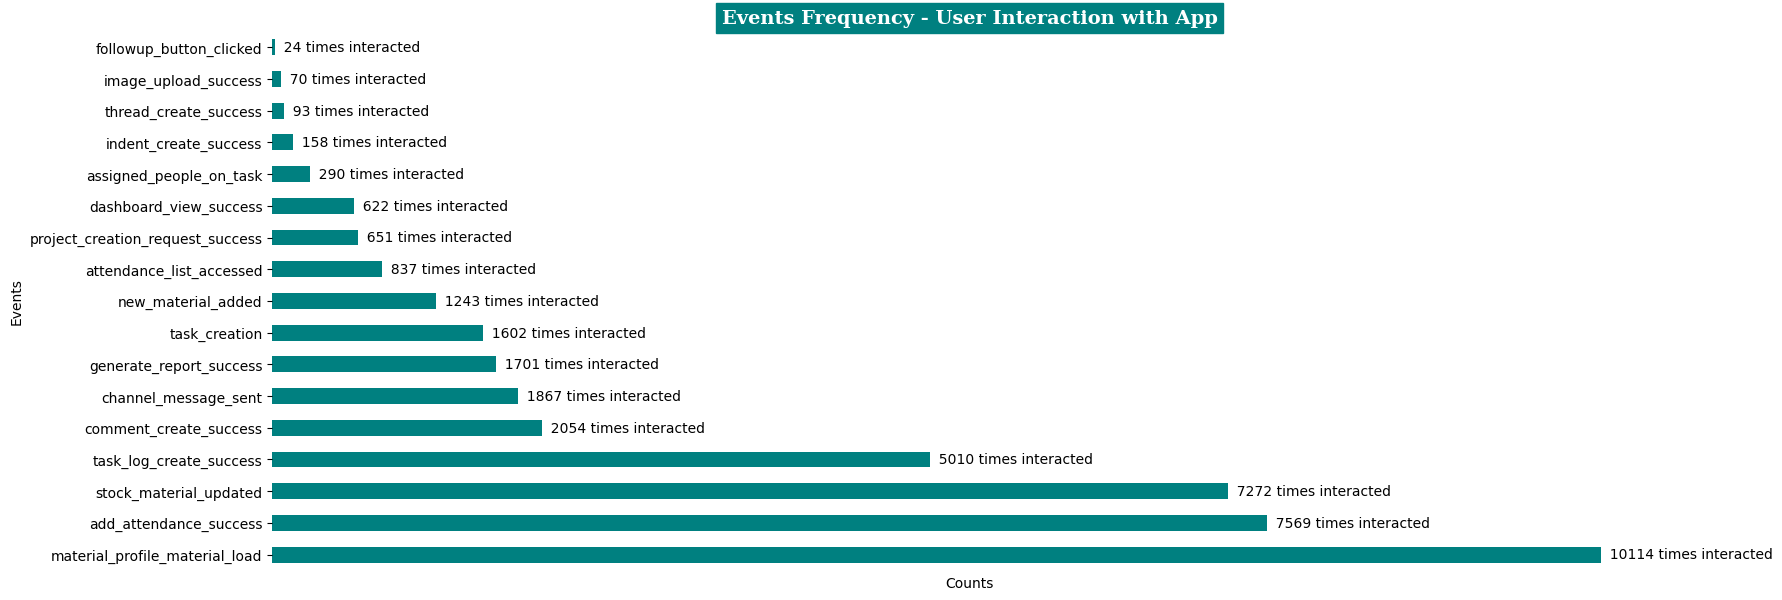

In [43]:
event_counts = df['event'].value_counts()

plt.figure(figsize=(18,7))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
a=event_counts.plot(kind='barh', color='teal')
a.bar_label(a.containers[0], label_type='edge', labels=[f'  {val} times interacted' for val in event_counts])
plt.title(f'Events Frequency - User Interaction with App',fontsize=14,fontfamily='serif',fontweight='bold',
          backgroundcolor='teal',color='w')
sns.despine(left=True , bottom=True)
plt.xlabel('Counts')
plt.ylabel('Events')
plt.xticks([])
plt.show()

#### 🔹Insights:

* The Top 10 most common events and their frequencies:
    * 1. Material_profile_material_load - 10114 occurrences
    * 2. Add_attendance_success - 7569 occurrences
    * 3. Stock_material_updated - 7272 occurrences
    * 4. Task_log_create_success - 5010 occurrences
    * 5. Comment_create_success - 2054 occurrences
    * 6. Channel_message_sent - 1867 occurrences
    * 7. Generate_report_success - 1701 occurrences
    * 8. Task_creation - 1602 occurrences
    * 9. New_material_added - 1243 occurrences
    * 10. Attendance_list_accessed - 837 occurrences

> **This help us understand the most common interactions users have with the app.**

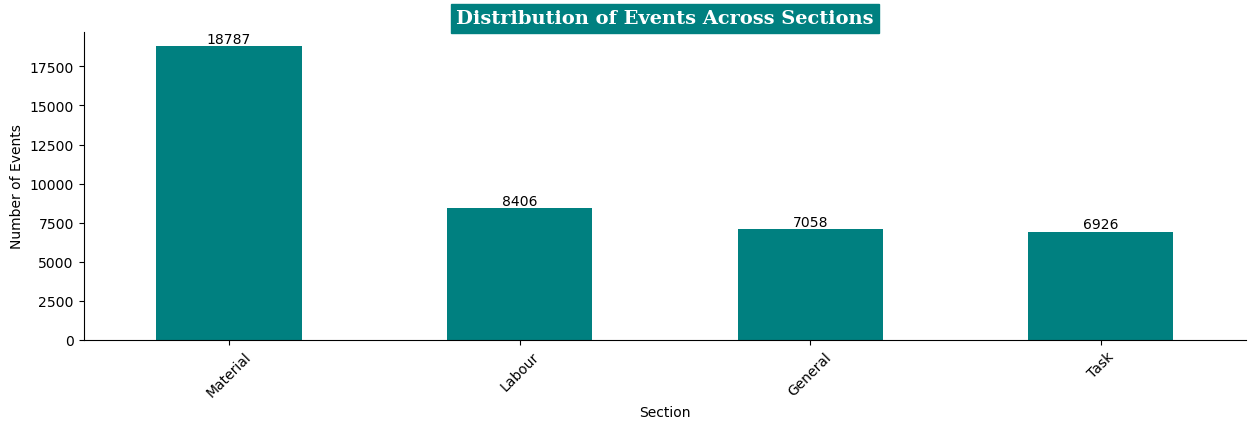

In [31]:
section_counts = df['Section'].value_counts()

plt.figure(figsize=(15,4))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

a=section_counts.plot(kind='bar', color='teal')
a.bar_label(a.containers[0], label_type='edge')
plt.title(f'Distribution of Events Across Sections',fontsize=14,fontfamily='serif',fontweight='bold',
          backgroundcolor='teal',color='w')
sns.despine()
plt.xlabel('Section')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

#### 🔹Insights:

* The No.of Events happend in each section:
    * Material section - 18787 events
    * Labour section - 8406 events
    * General Section - 7058 events
    * Task section - 6926 events
    
> **This tells us that Users interact with `Material Section` at an enormously higher rate compared to other sections through the App.**

In [65]:
interaction_analysis = df.groupby('Description')['user_id'].nunique().sort_values(ascending=False)
iad = interaction_analysis.to_frame()
iad

,user_id
Description,
Successfully creating a new project,401
Successfully creating an update on a particular task,287
Successfully creating a task,245
Report for the overall work done generated for a particular project/org,244
Successfully adding attendance of a person once,136
Material Added to Inventory in 'Material' Section,130
Material list page opens on clicking this button,121
Comment Created,96
Updating Stock in the inventory,90


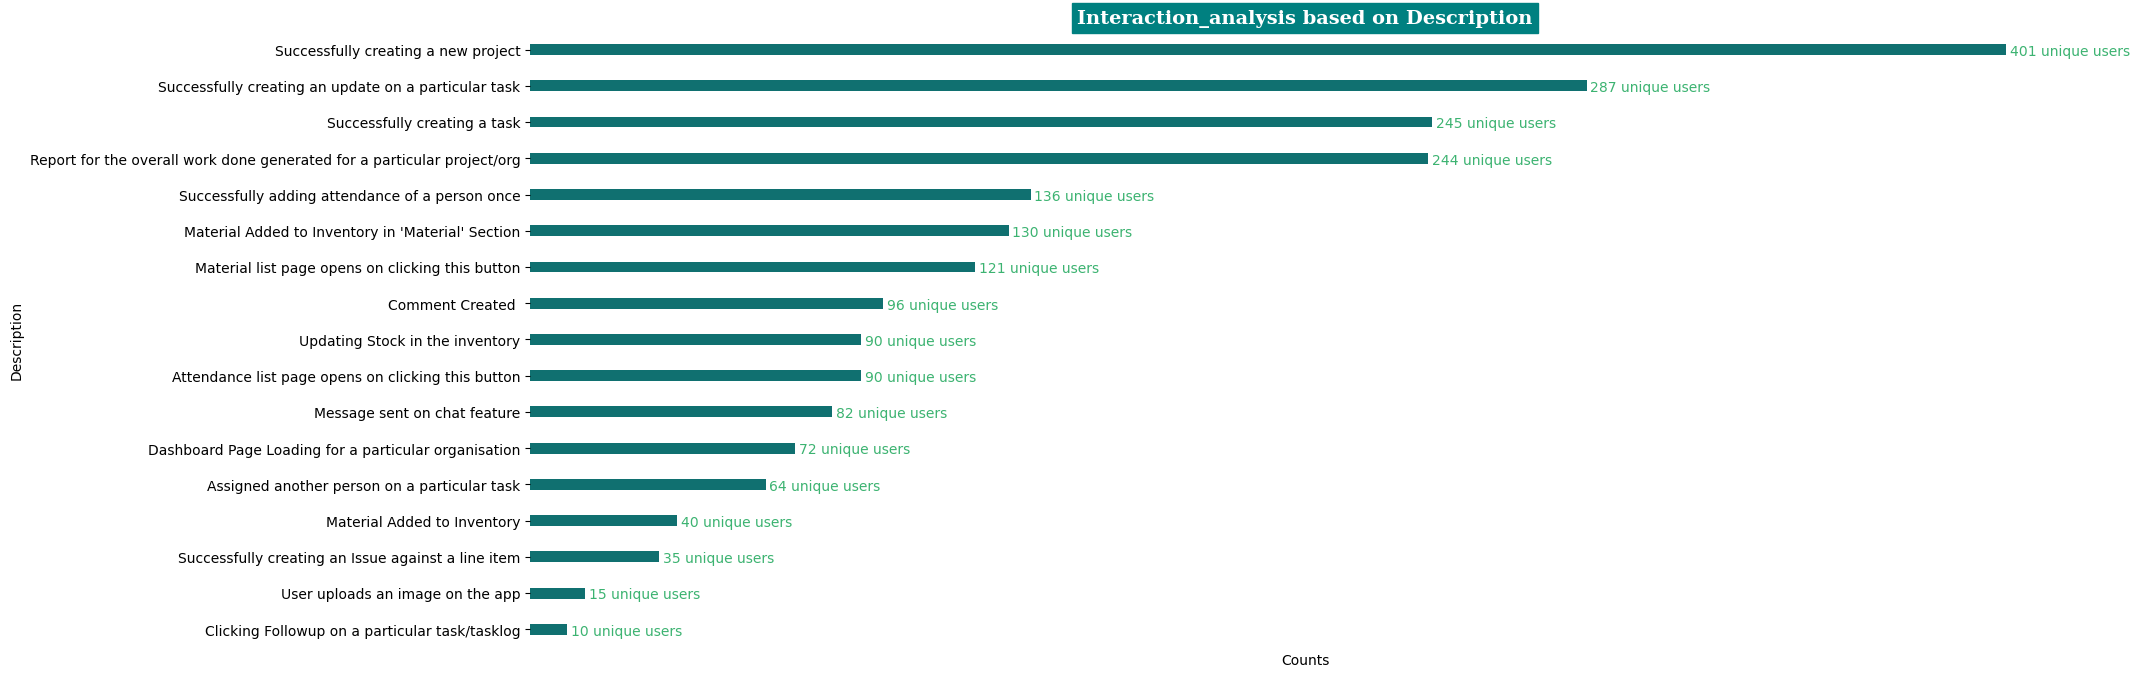

In [87]:
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

c1=sns.barplot(data=iad , x=iad.user_id , y=iad.index, orient='h' , color='teal' , width=0.3)

plt.title(f'Interaction_analysis based on Description',fontsize=14,fontfamily='serif',fontweight='bold',
          backgroundcolor='teal',color='w')
top_n = 17
for i in range(top_n):
    c1.annotate(f"{iad.user_id[i]} unique users", ((iad.user_id[i]+1),i+0.15), ha='left', va='baseline',color='mediumseagreen')
sns.despine(left=True , bottom=True)
plt.xlabel('Counts')
plt.ylabel('Description')
plt.xticks([])
plt.show()

#### 🔹Insights:

* The analysis of event descriptions and their impact on user interactions shows the following top 10 descriptions with unique user interactions:
    * 1. Successfully creating a new project: 401 unique users
    * 2. Successfully creating an update on a particular task: 287 unique users
    * 3. Successfully creating a task: 245 unique users
    * 4. Report for the overall work done generated for a particular project/org: 244 unique users
    * 5. Successfully adding attendance of a person once: 136 unique users
    * 6. Material Added to Inventory in 'Material' Section: 130 unique users
    * 7. Material list page opens on clicking this button: 121 unique users
    * 8. Comment Created: 96 unique users
    * 9. Updating Stock in the inventory: 90 unique users
    * 10. Attendance list page opens on clicking this button: 90 unique users
    
    
> **These insights provide valuable information on the user engagement triggered by different event descriptions.**

In [89]:
df.groupby(['event','Description'])['user_id'].nunique().sort_values(ascending=False)

event                             Description                                                            
project_creation_request_success  Successfully creating a new project                                        401
task_log_create_success           Successfully creating an update on a particular task                       287
task_creation                     Successfully creating a task                                               245
generate_report_success           Report for the overall work done generated for a particular project/org    244
add_attendance_success            Successfully adding attendance of a person once                            136
new_material_added                Material Added to Inventory in 'Material' Section                          130
material_profile_material_load    Material list page opens on clicking this button                           121
comment_create_success            Comment Created                                                      

In [90]:
df.groupby(['event','Section'])['user_id'].nunique().sort_values(ascending=False)

event                             Section 
project_creation_request_success  General     401
task_log_create_success           Task        287
task_creation                     Task        245
generate_report_success           General     244
add_attendance_success            Labour      136
new_material_added                Material    130
material_profile_material_load    Material    121
comment_create_success            General      96
attendance_list_accessed          Labour       90
stock_material_updated            Material     90
channel_message_sent              General      82
dashboard_view_success            General      72
assigned_people_on_task           Task         64
indent_create_success             Material     40
thread_create_success             General      35
image_upload_success              General      15
followup_button_clicked           Task         10
Name: user_id, dtype: int64

In [96]:
df.groupby('Section')[['event']].nunique()

,event
Section,
General,7
Labour,2
Material,4
Task,4


In [116]:
df.groupby(['Section','event'])['user_id'].nunique()

Section   event                           
General   channel_message_sent                 82
          comment_create_success               96
          dashboard_view_success               72
          generate_report_success             244
          image_upload_success                 15
          project_creation_request_success    401
          thread_create_success                35
Labour    add_attendance_success              136
          attendance_list_accessed             90
Material  indent_create_success                40
          material_profile_material_load      121
          new_material_added                  130
          stock_material_updated               90
Task      assigned_people_on_task              64
          followup_button_clicked              10
          task_creation                       245
          task_log_create_success             287
Name: user_id, dtype: int64

In [122]:
df['month'] = df['created_at_time'].dt.month
df['year'] = df['created_at_time'].dt.year

In [126]:
df['day'] = df['created_at_time'].dt.day_name()

In [127]:
df

,created_at_time,event,org_id,project_id,user_id,Description,Section,month,year,day
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General,4,2022,Wednesday
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating an update on a particula...,Task,4,2022,Monday
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating a task,Task,4,2022,Monday
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General,4,2022,Monday
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,Successfully creating an update on a particula...,Task,3,2022,Tuesday
...,...,...,...,...,...,...,...,...,...,...
41172,2022-04-07 08:12:59,assigned_people_on_task,ORG588585401431,PRJ971575485352,USR811917964372,Assigned another person on a particular task,Task,4,2022,Thursday
41173,2022-04-07 10:30:06,assigned_people_on_task,ORG588585401431,PRJ497168717769,USR811917964372,Assigned another person on a particular task,Task,4,2022,Thursday
41174,2022-04-12 17:54:06,assigned_people_on_task,ORG588585401431,PRJjzxmbzag9e6v,USR189569223674,Assigned another person on a particular task,Task,4,2022,Tuesday
41175,2022-02-21 23:59:56,task_creation,ORG593668212572,PRJ436423104439,USR067850628645,Successfully creating a task,Task,2,2022,Monday


In [129]:
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['month'] = df['month'].map(month_mapping)
df.head()

,created_at_time,event,org_id,project_id,user_id,Description,Section,month,year,day,month_name
0,2022-04-20 18:24:30,project_creation_request_success,ORG-2nufoaj370k,PRJ4k2kct6c5854,USRl50abktx6cc1,Successfully creating a new project,General,April,2022,Wednesday,April
1,2022-04-25 23:29:54,task_log_create_success,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating an update on a particula...,Task,April,2022,Monday,April
2,2022-04-25 23:29:54,task_creation,ORG-7fcq2k7b4xg,PRJ0ypqfy9v4kii,USRqki2dkqwj6xj,Successfully creating a task,Task,April,2022,Monday,April
3,2022-04-25 23:28:23,project_creation_request_success,ORG-7fcq2k7b4xg,PRJfk9dy2gb6dhp,USRqki2dkqwj6xj,Successfully creating a new project,General,April,2022,Monday,April
4,2022-03-22 20:40:20,task_log_create_success,ORG-iluuim4club,PRJ1jrd11tr99dc,USRcsxgn7-vnztk,Successfully creating an update on a particula...,Task,March,2022,Tuesday,March


In [137]:
month_order = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 
               'October', 'November', 'December']
df['month']= pd.Categorical(df['month'],categories=month_order, ordered=True)

In [138]:
day_order = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday']
df['day']= pd.Categorical(df['day'],categories=day_order, ordered=True)

In [144]:
Monthly_user_interaction = df.groupby(['year','month','day'])[['user_id']].count()
Monthly_user_interaction

user_id
year month    day               
2022 January  Monday         279
              Tuesday         87
              Wednesday      122
              Thrusday         0
              Friday          96
...                          ...
2023 December Wednesday        0
              Thrusday         0
              Friday           0
              Saturday         0
              Sunday           0

[168 rows x 1 columns]

In [158]:
Monthly_unique_user_interaction_pivot = df.pivot_table(index=['year','month'], 
                                                 columns='day', 
                                                 values='user_id', 
                                                 aggfunc=pd.Series.nunique).astype(int)
Monthly_unique_user_interaction_pivot

day             Monday  Tuesday  Wednesday  Friday  Saturday  Sunday
year month                                                          
2022 January        24       16         19      18        13      14
     February       48       36         34      41        56      41
     March          47       55         53      43        38      38
     April          42       40         41      52        42      22
     May            57       54         47      47        47      46
     June           46       52         57      51        40      37
     July           39       37         41      46        50      34
     August         44       44         42      37        34      22
     September      18       17         23      19        24      10
     October        18       14         11      20        20      16
     November       20       16         21      13        16       7
     December       13       12         13      13        14       9
2023 January        12        9         10       9         8       6
     February        8       10         13      14        12       8

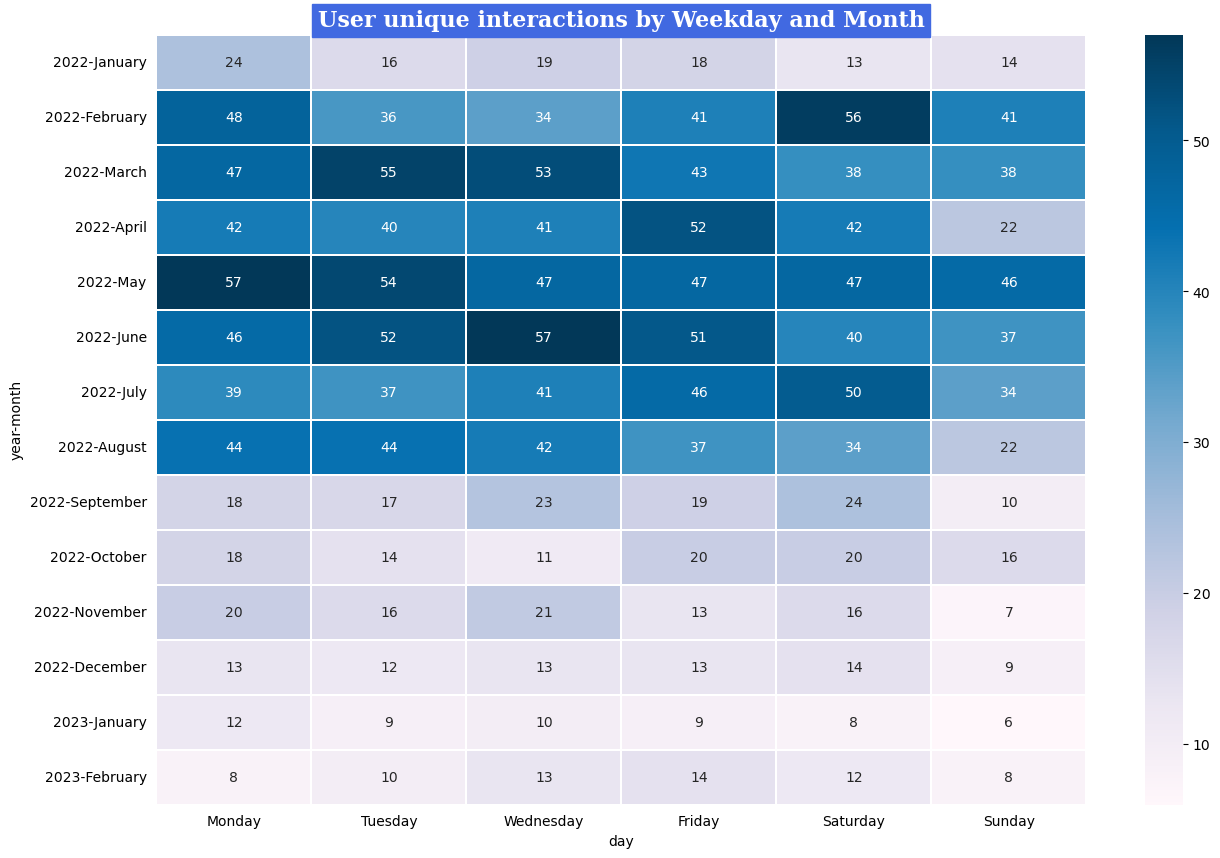

In [172]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(Monthly_unique_user_interaction_pivot, cmap='PuBu',annot=True, fmt='d' , linewidth=0.1)
plt.title("User unique interactions by Weekday and Month",fontsize=16,fontfamily='serif',fontweight='bold',
          backgroundcolor='royalblue',color='w')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [160]:
Monthly__user_interaction_pivot = df.pivot_table(index=['year','month'], 
                                                 columns='day', 
                                                 values='user_id', 
                                                 aggfunc=pd.Series.count).astype(int)
Monthly__user_interaction_pivot

day             Monday  Tuesday  Wednesday  Friday  Saturday  Sunday
year month                                                          
2022 January       279       87        122      96        51     159
     February      489      222        246     508       562     309
     March         553      800        884     671       569     270
     April         611      635        544     683       555     474
     May           785      796        545     722       723     633
     June          657     1017       1002     696       622     410
     July          546      411        498     694       573     304
     August        467      487        701     302       353     196
     September     353      223        376     377       366     247
     October       286      238        335     271       459     137
     November      441      606        363     377       459     210
     December      250      375        257     580       359     239
2023 January       223      246        180     252       230      80
     February      101      131        355     269       164      97

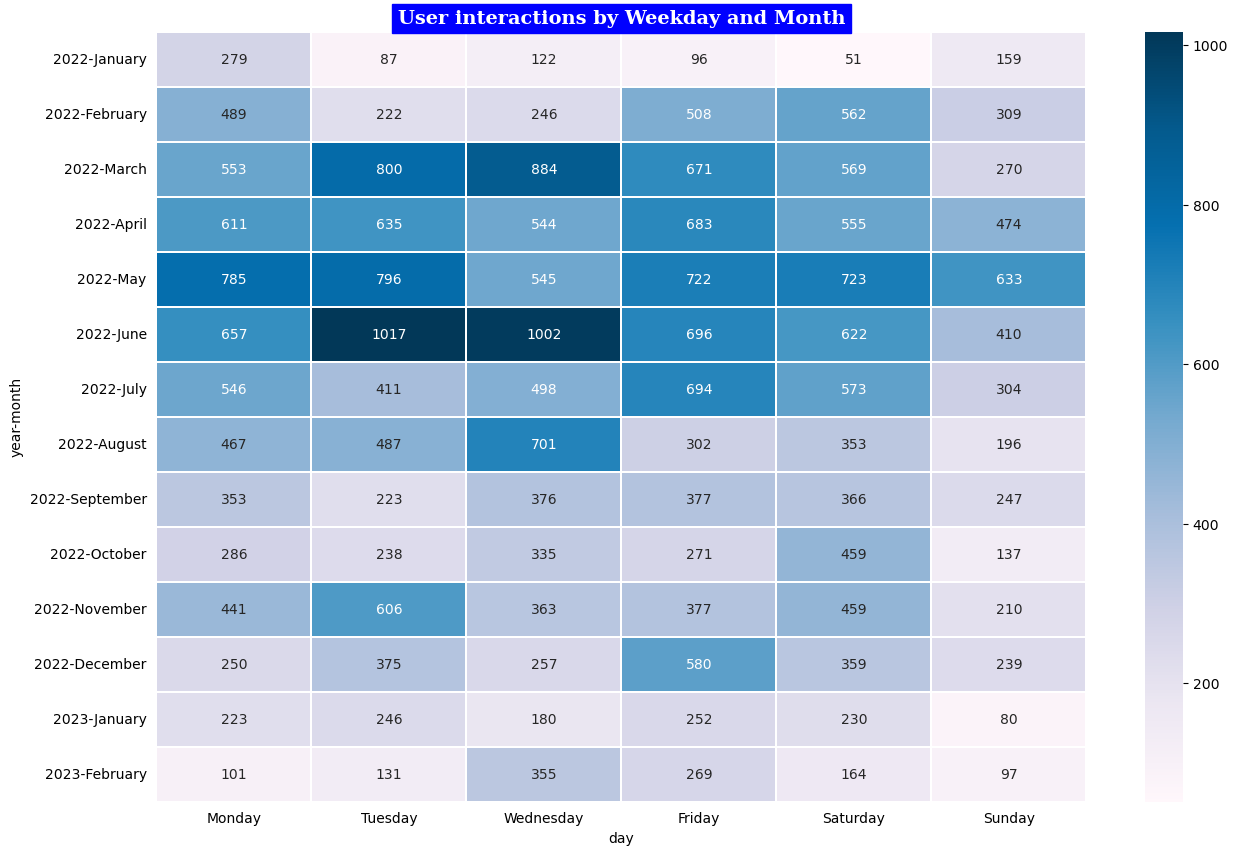

In [173]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(Monthly__user_interaction_pivot, cmap='PuBu',annot=True, fmt='d' , linewidth=0.1)
plt.title("User interactions by Weekday and Month",fontsize=14,fontfamily='serif',fontweight='bold',
          backgroundcolor='blue',color='w')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [163]:
df.sample()

,created_at_time,event,org_id,project_id,user_id,Description,Section,month,year,day,month_name
13449,2022-05-07 15:41:46,stock_material_updated,ORG400468153021,PRJ639384602336,USR939452321629,Updating Stock in the inventory,Material,May,2022,Saturday,May


In [169]:
Sectionwise_event = df.pivot_table(index='event', columns='Section', values='user_id', aggfunc=pd.Series.nunique).fillna(0).astype(int)
Sectionwise_event

Section,General,Labour,Material,Task
event,,,,
add_attendance_success,0,136,0,0
assigned_people_on_task,0,0,0,64
attendance_list_accessed,0,90,0,0
channel_message_sent,82,0,0,0
comment_create_success,96,0,0,0
dashboard_view_success,72,0,0,0
followup_button_clicked,0,0,0,10
generate_report_success,244,0,0,0
image_upload_success,15,0,0,0


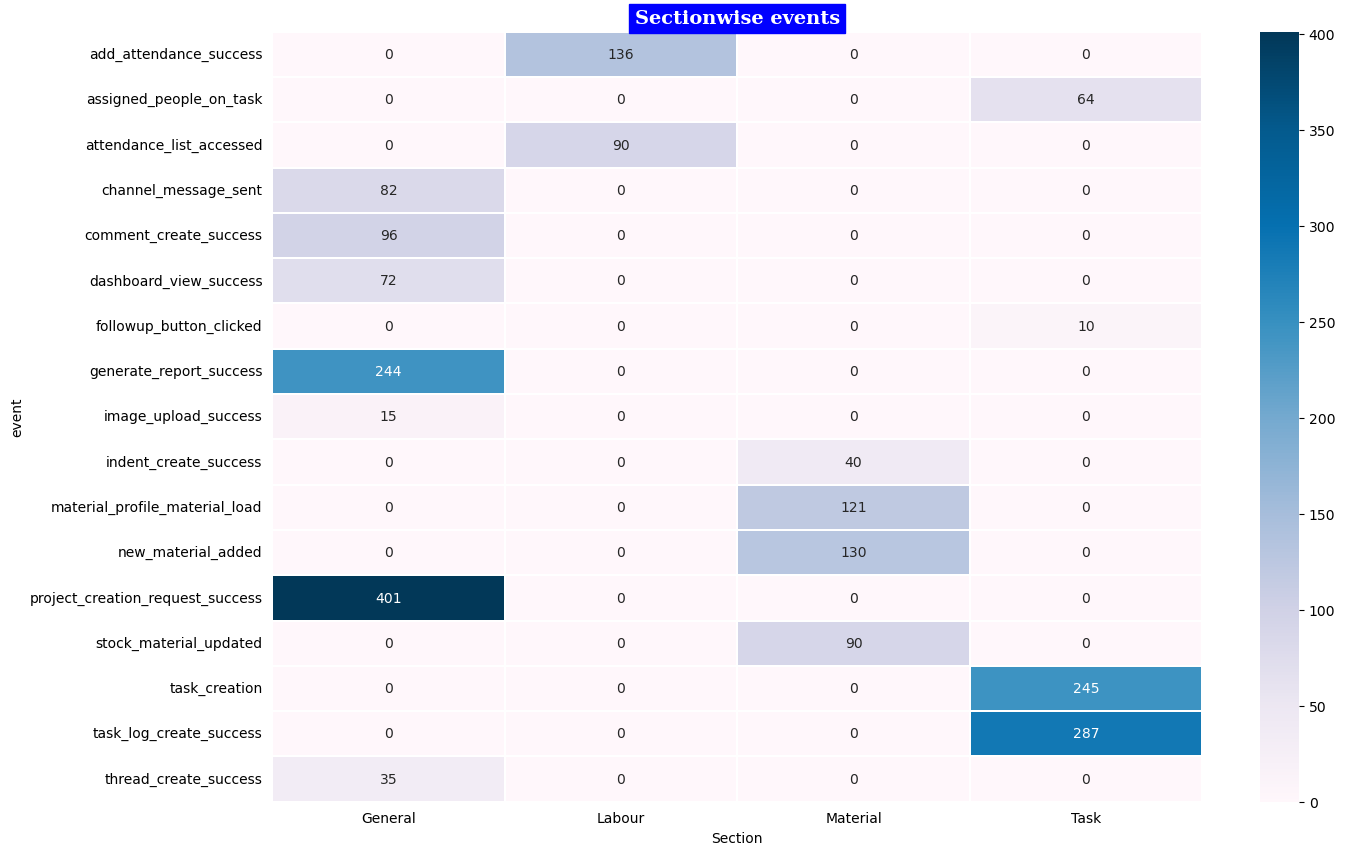

In [177]:
plt.figure(figsize=(15, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(Sectionwise_event, cmap='PuBu',annot=True, fmt='d' , linewidth=0.1)
plt.title('Sectionwise events',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='blue',color='w')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.show()

In [179]:
event_description = df.pivot_table(index='Description', columns='event', values='user_id', aggfunc=pd.Series.nunique).fillna(0).astype(int)
event_description

event,add_attendance_success,assigned_people_on_task,attendance_list_accessed,channel_message_sent,comment_create_success,dashboard_view_success,followup_button_clicked,generate_report_success,image_upload_success,indent_create_success,material_profile_material_load,new_material_added,project_creation_request_success,stock_material_updated,task_creation,task_log_create_success,thread_create_success
Description,,,,,,,,,,,,,,,,,
Assigned another person on a particular task,0,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Attendance list page opens on clicking this button,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Clicking Followup on a particular task/tasklog,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0
Comment Created,0,0,0,0,96,0,0,0,0,0,0,0,0,0,0,0,0
Dashboard Page Loading for a particular organisation,0,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0
Material Added to Inventory,0,0,0,0,0,0,0,0,0,40,0,0,0,0,0,0,0
Material Added to Inventory in 'Material' Section,0,0,0,0,0,0,0,0,0,0,0,130,0,0,0,0,0
Material list page opens on clicking this button,0,0,0,0,0,0,0,0,0,0,121,0,0,0,0,0,0
Message sent on chat feature,0,0,0,82,0,0,0,0,0,0,0,0,0,0,0,0,0


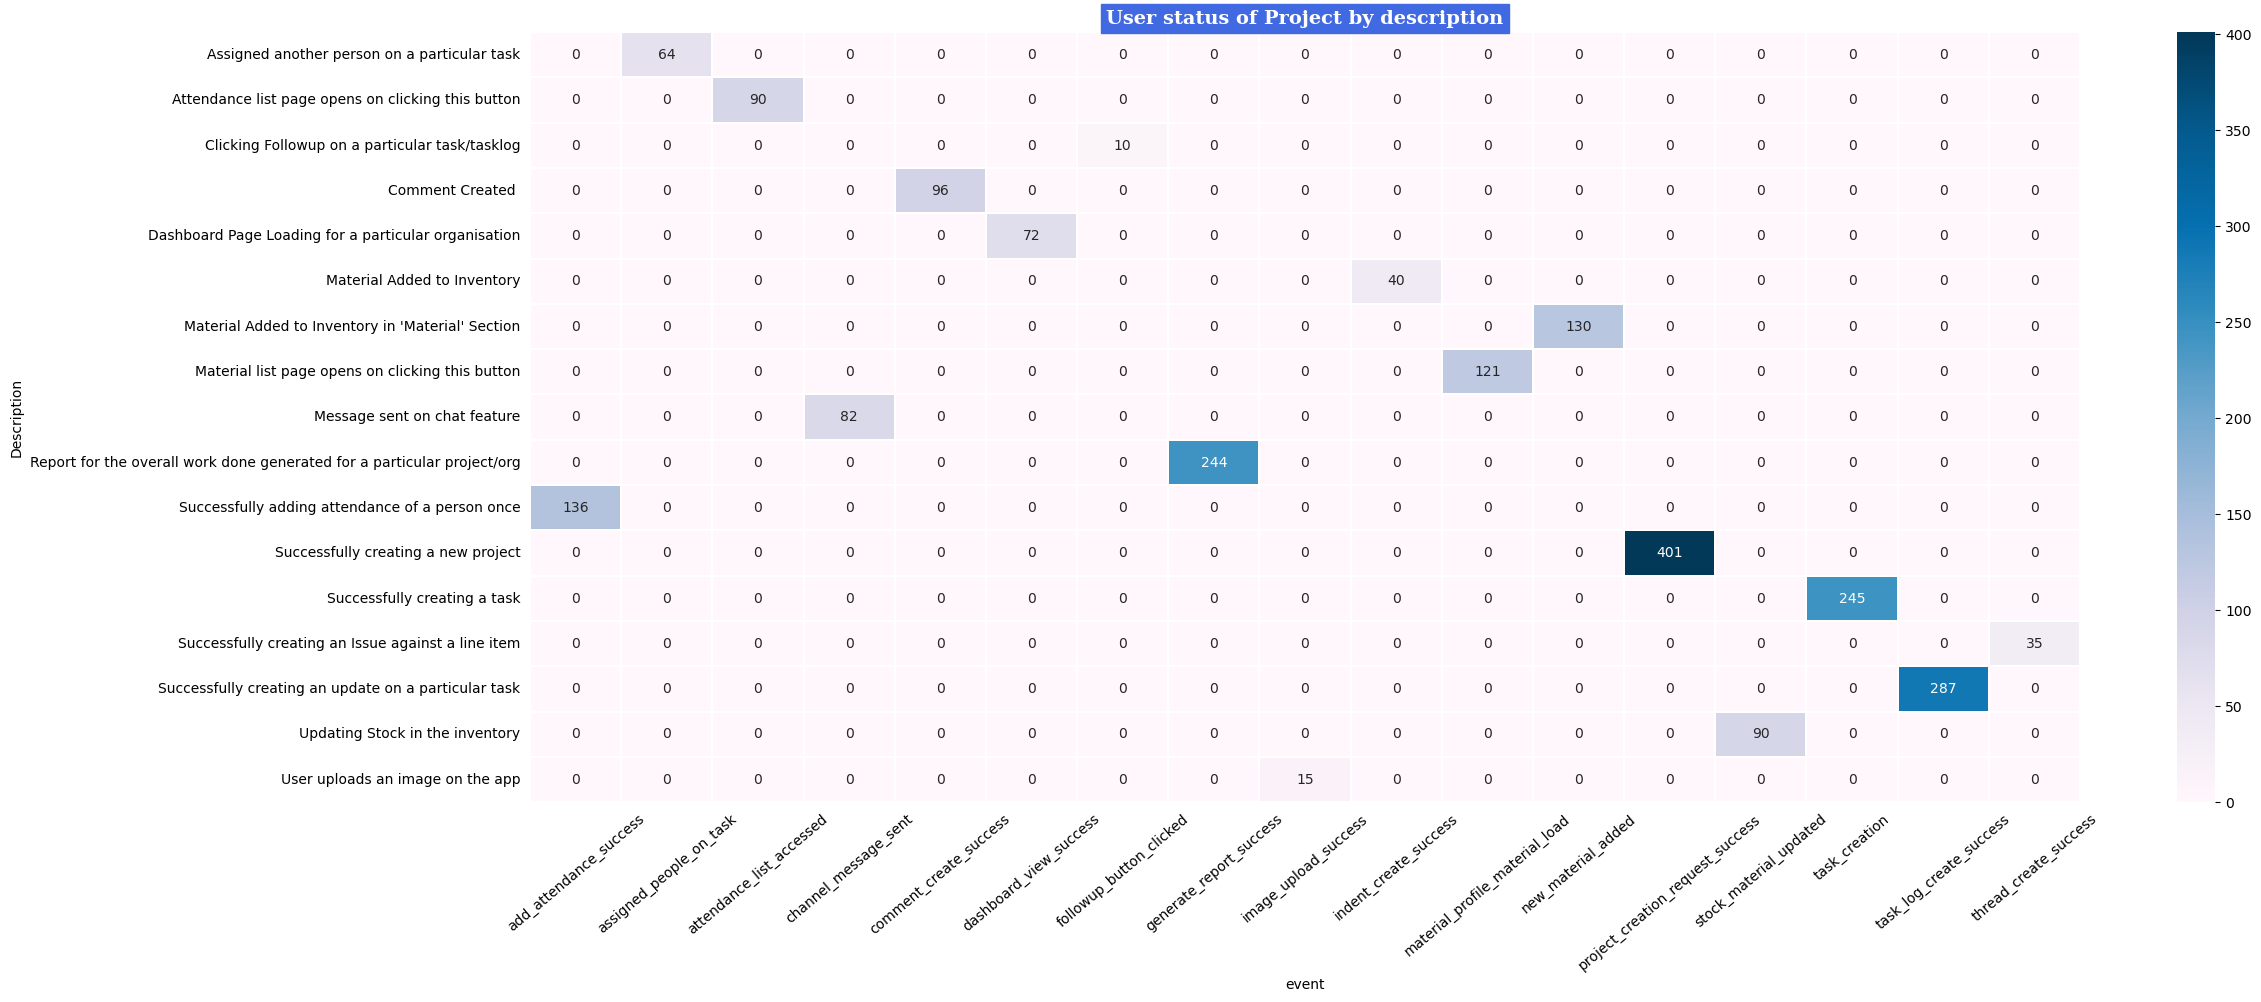

In [188]:
plt.figure(figsize=(25, 10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.heatmap(event_description, cmap='PuBu',annot=True, fmt='d' , linewidth=0.1)
plt.title('User status of Project by description',fontsize=14,fontfamily='serif',fontweight='bold',
          backgroundcolor='royalblue',color='w')
plt.tick_params(axis='both', which='both', left=False, bottom=False)
plt.xticks(rotation=40)
plt.show()

## Additional exploration - on Tableau

link - https://public.tableau.com/app/profile/kasi.muthuveerappan/viz/powerplayassesment-set4/userinteractionbasedontheevents#1

## ✴️Insights:

> **TimeFrame and Dataset Infographics:** 
   - The data was given ***417 days*** dating from `Jan 2022 till Feb 2023`.
   
>  **User Engagement Metrics:**
   - There are `543` unique users , `386` unique organizations and `914 known Projects` with 141 data with unknown project_id interact with the app.
   - User_d -> `USR509149973276` is the most frequent app user with 5438 events interactions
   - Project_id -> `Prj256203650640` is the project with most unique users interacted with the app 5832 times.
   
>  **Time-based Patterns:**
   - Mostly was used during the month of `March till June` and users engagement gradually decreases.
   - May be Because of the `seasonality` -> ***summer*** is most apt for construction purposes.
   - `92 Organizations` with event description as `Successfully created the project` during ***Feb-2022***
   - `81 projects` interacted with app for `435 times` to update the event description as '***Sucessfully creating an update on a particular Task***' during the month *Feb-2022*.

>  **Event Frequency:**
   * The analysis of event descriptions and their impact on user interactions shows the following top 10 descriptions with unique user interactions:
        * 1. Successfully creating a new project: 401 unique users
        * 2. Successfully creating an update on a particular task: 287 unique users
        * 3. Successfully creating a task: 245 unique users
        * 4. Report for the overall work done generated for a particular project/org: 244 unique users
        * 5. Successfully adding attendance of a person once: 136 unique users

> **Event Sections Analysis:**
   * The No.of Events happend in each section:
        * Material section - 18787 events
        * Labour section - 8406 events
        * General Section - 7058 events
        * Task section - 6926 events
   * **This tells us that Users interact with `Material Section` at an enormously higher rate compared to other sections through the App.**

> **User Feedback Analysis:**
   - If available, consider incorporating user feedback data to gain qualitative insights into user experiences and from organizations perspective to grow feasibly.
   
> **Trigger Identification:**
   - Patterns from timeframe indicates the there is `High User Engagement` during the ***Summer Seasons*** which is more opted by the consumers and therefore the the construction buisness hypes during the month the ***march till july***.
   - The Highest number of user interacting with the app mostly use the `Material Section` widely throughout the year and to communicate the status of the projects through the event description. 
   - `Quality Materials` correlates the `User satisfaction` which is the major trigger for making the organizations to becoming more engaged and active and some use for internal office communications.
   
   - The `Powerplay App` is used extensively by the organization to deal with ***Huge projects, status communication , material procurement, quality making and to attain customer satisfaction*** .
   - These Factors act as a ***Major Triggers for the Poweplay App interaction***.

-------